## Computational Drug Discovery - Comparing Regressors

In this Jupyter notebook, I will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 5**, I will be comparing several ML algorithms for build regression models of beta-secretase 1 inhibitors.

---

### Import libraries



In [2]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor 

### Load the data set

In [4]:
df = pd.read_csv('/data/beta_secretase_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis = 1)
Y = df.pIC50

### Data pre-processing

In [6]:
# examine X dimension
X.shape

(7234, 881)

In [7]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape 

(7234, 160)

In [8]:
# data splitting using 80/20 ration
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Compare ML algorithms

In [27]:
# inspired by https://github.com/shankarpandala/lazypredict/issues/317

# a way to get training completed faster
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

chosen_regressors = [
    'DecisionTreeRegressor',
    'ExtraTreeRegressor',
    'ExtraTreesRegressor',
    'GaussianProcessRegressor',
    'RandomForestRegressor',
    'BaggingRegressor',
    'MLPRegressor',
    'HistGradientBoostingRegressor',
    'LGBMRegressor',
    'KNeighborsRegressor',
    'SVR',
    'NuSVR',
    'GradientBoostingRegressor',
    'XGBRegressor',
    'Ridge',
    'LassoCV',
    'ElasticNetCV',
    'RidgeCV',
    'TransformedTargetRegressor',
    'LinearRegression',
    'SGDRegressor',
    'BayesianRidge',
    'HuberRegressor',
    'LassoLarsCV',
    'LassoLarsIC',
    'LinearSVR',
    'AdaBoostRegressor',
    'Lars',
    'OrthogonalMatchingPursuitCV',
    'OrthogonalMatchingPursuit',
    'Lars',
    'Lasso',
    'ElasticNet',
    'DummyRegressor',
    'LassoLars',
    'PassiveAggressiveRegressor',
    'KernelRidge',
    'RANSACRegressor'
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]

In [33]:
# defines and builds the lazyclassifier (which builds over 20 machine learning models)
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None, regressors = REGRESSORS)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 35/35 [01:06<00:00,  1.89s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 35/35 [00:52<00:00,  1.49s/it]


In [34]:
# performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.84,0.85,0.54,8.88
DecisionTreeRegressor,0.84,0.85,0.54,0.18
ExtraTreeRegressor,0.84,0.85,0.54,0.15
GaussianProcessRegressor,0.84,0.85,0.54,13.35
RandomForestRegressor,0.80,0.80,0.62,6.68
BaggingRegressor,0.78,0.78,0.65,0.93
MLPRegressor,0.73,0.73,0.72,6.21
HistGradientBoostingRegressor,0.58,0.59,0.88,0.99
KNeighborsRegressor,0.57,0.58,0.90,0.88


In [35]:
# performance table fo the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.38,0.45,1.05,0.95
NuSVR,0.37,0.44,1.06,2.15
SVR,0.37,0.44,1.06,2.85
RandomForestRegressor,0.34,0.42,1.08,6.14
KNeighborsRegressor,0.32,0.40,1.10,0.27
BaggingRegressor,0.31,0.39,1.10,0.65
GradientBoostingRegressor,0.30,0.38,1.11,2.50
MLPRegressor,0.27,0.35,1.14,6.26
RidgeCV,0.23,0.31,1.17,0.13


### Data visualization of model performance

In [ ]:
# bar plot of R-squared values

[(0.0, 1.0)]

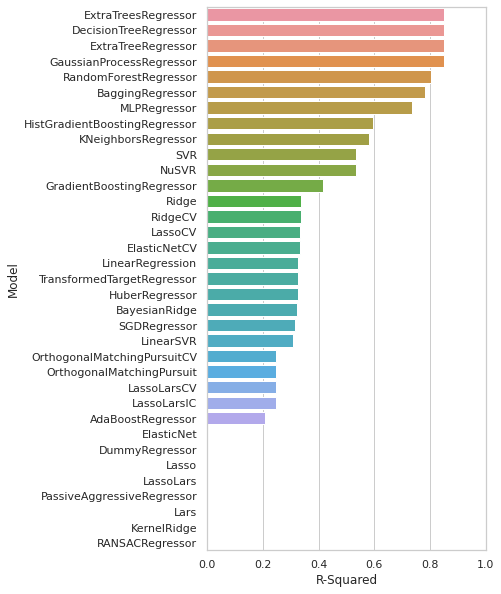

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style= "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "R-Squared", data = predictions_train)
ax.set(xlim = (0, 1))

[(0.0, 10.0)]

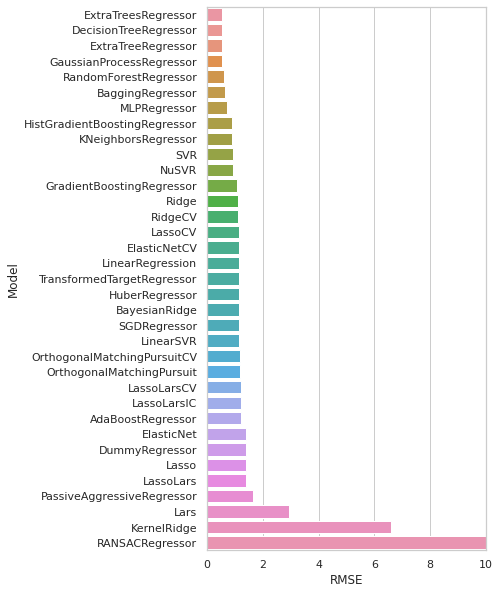

In [38]:
# bar plot of RMSE values
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "RMSE", data = predictions_train)
ax.set(xlim = (0, 10))

[(0.0, 10.0)]

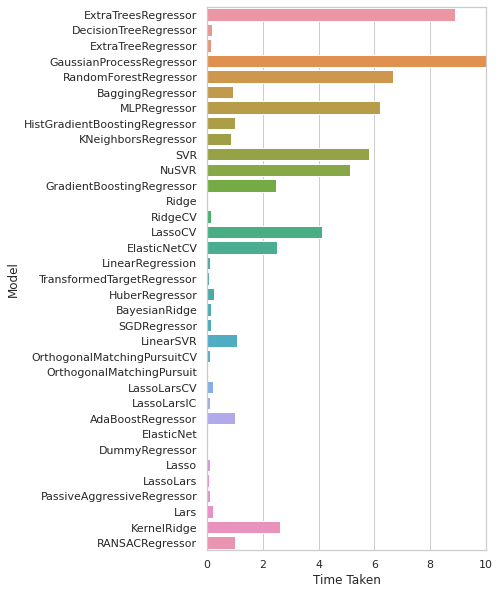

In [40]:
# bar plot of calculation time
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "Time Taken", data = predictions_train)
ax.set(xlim = (0, 10))